# Ryan's Lab 4 Project
**Author:** Ryan Krabbe  
**Date:** 4/02/2025

**Objective:** Use the Titantic dataset to predict `fare` using different regression models.


## Introduction
This project uses the Titantic dataset to predict `fare` based on different features such as `age`, `sex`, `pclass` and `family_size`. In this project, I'll incorporate different machine models and techniques to predict passenger fare.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [141]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data

### Load the Titanic dataset and confirm it’s structured correctly

In [142]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### Load the Titanic dataset and confirm it’s structured correctly

In [143]:
# Fill missing 'age' with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing 'sex' with mode before encoding
titanic['sex'] = titanic['sex'].fillna(titanic['sex'].mode().iloc[0])
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [145]:
# Case 1. age only
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age and family size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. age, pclass, sex and embarked
X4 = titanic[['age', 'pclass', 'sex']]
y4 = titanic['fare']

## Section 3. Feature Selection and Justification

Reflection Questions

Why might these features affect a passenger’s fare: 
    - `age`: Children might have different fares compared to adults
    - `family_size`: Families might book together, which could result in reduced passenger fares
    - `sex`: Sex could interact with other features such as `family_size` or `embarked`
    - `pclass` - This is strongly correlated with fare based on the class that passengers were in
List all available features:
- `survived`
- `pclass`
- `sex`
- `age`
- `sibsp`
- `parch`
- `fare`
- `embarked`
- `class`
- `who`
- `adult_male`
- `deck`
- `embark_town`
- `alive`
- `alone`
Which other features could improve predictions and why:
- `alone`: If a passenger is traveling alone it could lead to different prices within the fare
- `ticket`: Possibly the ticket could provide minor details about a passengers fare
How many variables are in your Case 4:
- 3 variables
Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 
- `age`: Children might have different fares compared to adults
- `sex`: Sex could interact with other features such as `family_size` or `embarked`
- `pclass` - This is strongly correlated with fare based on the class that passengers were in

## Section 4. Train a Regression Model (Linear Regression)

## 4.1 Split the Data

In [148]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

## 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [150]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

## 4.3 Report Performance

In [156]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1) ** 0.5)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2) ** 0.5)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3) ** 0.5)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4) ** 0.5)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.3151329425803896
Case 4: Test R²: 0.35025268636237106
Case 4: Test RMSE: 30.66018284544514
Case 4: Test MAE: 20.47729671828975


### Section 4 Reflection Questions

Compare the train vs test results for each.

Did Case 1 overfit or underfit? Explain: Underfit meaning age is not predictive of fare.
Did Case 2 overfit or underfit? Explain: Underfit, but not as much as case 1. Family_size is not very predictive of fare.
Did Case 3 overfit or underfit? Explain: Underfit, another improvement, but still not predictive of fare.
Did Case 4 overfit or underfit? Explain: The training R² of 0.32 and Test R² of 0.35 means this was a good fit and not underfit or overfit. These features were highly predictive of fare.

Adding Age

Did adding age improve the model: Yes, but very slightly. Age on it's own did not improve the model it only improved the model slighly when it was used with other features.
Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Age is not indictive of fare like some other features are. For example, a 60 year old passenger who is traveling in third class would pay less than a 5 year old passenger in first class.

Worst

Which case performed the worst: Case 1
How do you know: Case 1 had the lowest R² and highest RMSE and MAE.
Do you think adding more training data would improve it (and why/why not): Maybe slightly, but honestly not too much. What I gathered from all of this is that age is not a strong predictor of fare.

Best

Which case performed the best: Case 4
How do you know: Case 4 had the highest R² and lowest RMSE and MAE.
Do you think adding more training data would improve it (and why/why not): Yes, I think so. The model already ran well with the features selected, but adding another strong feature could improve the model even more so.

## Section 5. Compare Alternative Models
Case 4 was the best model from the previous section so that's what I'll use going forward.

### 5.1 Ridge Regression (L2 penalty)

In [168]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y4_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

In [173]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y4_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [174]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y4_pred_poly = poly_model.predict(X4_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

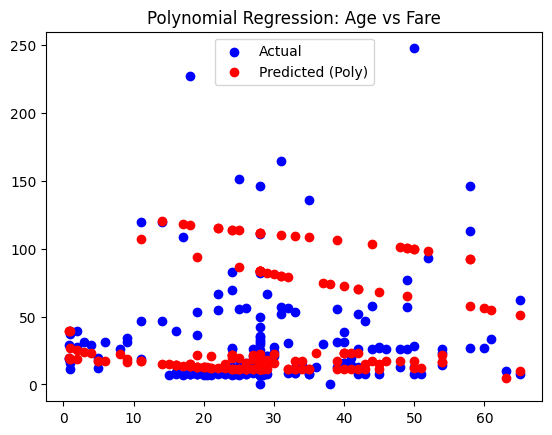

In [175]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

### 5.4 Reflections
What patterns does the cubic model seem to capture: Fare increases slightly as age increases and the fare for middle aged passengers tends to be more spread out
Where does it perform well or poorly: The youngest age is where the model performs the best. The model performed poorly where there's outliers near the top in the middle ages.
Did the polynomial fit outperform linear regression: Yes
Where (on the graph or among which kinds of data points) does it fit best: It fits best in the middle age 20-40 years old

### 5.4 Compare All Models

In [176]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred) ** 0.5:.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear (Case 4)", y4_test, y_pred_test4)
report("Ridge (Case 4)", y4_test, y4_pred_ridge)
report("ElasticNet (Case 4)", y4_test, y4_pred_elastic)
report("Polynomial (Case 4)", y4_test, y4_pred_poly)

Linear (Case 4) R²: 0.350
Linear (Case 4) RMSE: 30.66
Linear (Case 4) MAE: 20.48

Ridge (Case 4) R²: 0.351
Ridge (Case 4) RMSE: 30.65
Ridge (Case 4) MAE: 20.45

ElasticNet (Case 4) R²: 0.379
ElasticNet (Case 4) RMSE: 29.98
ElasticNet (Case 4) MAE: 19.05

Polynomial (Case 4) R²: 0.447
Polynomial (Case 4) RMSE: 28.29
Polynomial (Case 4) MAE: 17.31



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

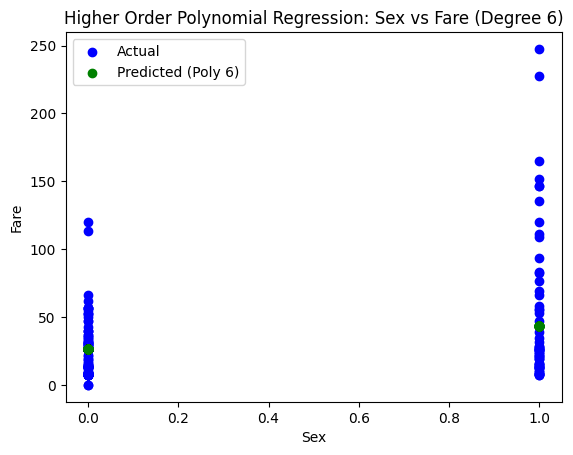

In [ ]:
# Set up the poly inputs
poly_high_order = PolynomialFeatures(degree=6)

# Extract only sex
X4_pclass_train = X4_train[['sex']] 
X4_pclass_test = X4_test[['sex']]  

# Transform the 'pclass' feature using PolynomialFeatures
X4_pclass_train_poly = poly_high_order.fit_transform(X4_pclass_train)
X4_pclass_test_poly = poly_high_order.transform(X4_pclass_test)

# Train Linear Regression Model
poly_model_high = LinearRegression()
poly_model_high.fit(X4_pclass_train_poly, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_pclass_test_poly)

# Plot the higher-order polynomial regression fit for 'family_size'
plt.scatter(X4_pclass_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_pclass_test, y_pred_poly_high, color='green', label='Predicted (Poly 6)')
plt.legend()
plt.title("Higher Order Polynomial Regression: Sex vs Fare (Degree 6)")
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.show()

My initial cubic (3) model performed better than my higher degree polynomial (6) model. The `sex` model only had two results to choose from (male vs female) so the the model basically returned a group average of the two whereas the `age` model had more options to choose from and this was reflected in the model results.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

What features were most useful?
- The features that I used were `pclass`, `sex`, `family_size`, and `age`. By far the most predictive feature of fare that I used was `pclass`. All of the other features helped moderately and needed to be combined with other features to help predict fare.

What regression model performed best?
- The Ridge Regression model performed the best overall followed by the Linear Regression model.

How did model complexity or regularization affect results?
- Model complexity had a large effect on results. Increased complexity or adding more features to the model can lead to overfitting if the features are noisy. Regularization was introduced in my Ridge Regression model and that model performed the best from the models used. The regularization helped stabilize and improve generalization within the model.

### 6.2 Discuss Challenges Faced

Was fare hard to predict? Why?
- Yes, fare was hard to predict especially only using the couple features that were used in this project. Fare is influenced by several different features, many of which were not used in the models, which limited performance. Some of the features that were used `pclass`, `sex`, and `fare` are not always linear so polynomial regression was introduced to try and combat this, however, `sex` and `pclass` do not benefit much from polynomial complexity.

Did skew or outliers impact the models?
- Yes, both impacted the models. The fare distribution is heavily right skewed resulting in outliers that inflated the error metrics and reduced model accuracy.